In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
from sklearn.svm import SVR
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.model_selection import KFold, cross_val_score


In [3]:
file_path =  "/content/gdrive/MyDrive/extended_patient_data.xlsx"
# Read the Excel file
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe
print(data.head())

  Patient ID  Age  Gender                 Cognitive Status  \
0       P007   62    Male  Mild Cognitive Impairment (MCI)   
1       P008   64    Male  Mild Cognitive Impairment (MCI)   
2       P009   77    Male  Mild Cognitive Impairment (MCI)   
3       P010   76    Male  Mild Cognitive Impairment (MCI)   
4       P011   77  Female       Alzheimerâ€™s Disease (AD)   

   Retinal Nerve Fiber Layer (RNFL) Thickness (Âµm)  Macular Thickness (Âµm)  \
0                                              80.7                    246.7   
1                                              66.2                    240.2   
2                                              67.0                    286.2   
3                                              80.4                    259.9   
4                                              92.3                    286.2   

  Retinal Amyloid Presence       Ocular Biomarkers Amyloid PET Scan Status  
0                  Present  Elevated Tau and P-tau                Neg

In [4]:
# Drop 'Patient ID' as it's an identifier, not a feature, and separate the target variable
features_df = data.drop(columns=['Patient ID', 'Amyloid PET Scan Status'])
target_series = data['Amyloid PET Scan Status']

# Identify categorical columns for one-hot encoding
categorical_cols = features_df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical features
X_processed = pd.get_dummies(features_df, columns=categorical_cols, drop_first=True)

# Convert target variable to numerical (e.g., using LabelEncoder for 'Positive'/'Negative')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(target_series)

# Convert the processed features DataFrame to a NumPy array
X = X_processed.values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
numeric_cols = X_processed.select_dtypes(include=["int64", "float64", "bool"]).columns

print("Numeric columns after one-hot encoding:")
print(numeric_cols)

print("\nPreview of processed feature data:")
print(X_processed.head())

Numeric columns after one-hot encoding:
Index(['Age', 'Retinal Nerve Fiber Layer (RNFL) Thickness (Âµm)',
       'Macular Thickness (Âµm)', 'Gender_Male',
       'Cognitive Status_Alzheimerâ€™s Disease (AD)',
       'Cognitive Status_Healthy Control',
       'Cognitive Status_Mild Cognitive Impairment (MCI)',
       'Retinal Amyloid Presence_Present', 'Ocular Biomarkers_Decreased Aβ42',
       'Ocular Biomarkers_Elevated Tau',
       'Ocular Biomarkers_Elevated Tau and P-tau',
       'Ocular Biomarkers_Normal Levels'],
      dtype='object')

Preview of processed feature data:
   Age  Retinal Nerve Fiber Layer (RNFL) Thickness (Âµm)  \
0   62                                              80.7   
1   64                                              66.2   
2   77                                              67.0   
3   76                                              80.4   
4   77                                              92.3   

   Macular Thickness (Âµm)  Gender_Male  \
0            

In [7]:
import numpy as np

def normalize(X):
  """Normalizes data using the Min-Max scaling formula.

  Args:
    X: The data to be normalized (NumPy array or pandas DataFrame).

  Returns:
    The normalized data.
  """
  X_min = np.min(X, axis=0)  # Calculate minimum values for each feature
  X_max = np.max(X, axis=0)  # Calculate maximum values for each feature
  X_scaled = (X - X_min) / (X_max - X_min)  # Apply the normalization formula
  return X_scaled

# Apply normalization to your data
X_normalized = normalize(X)

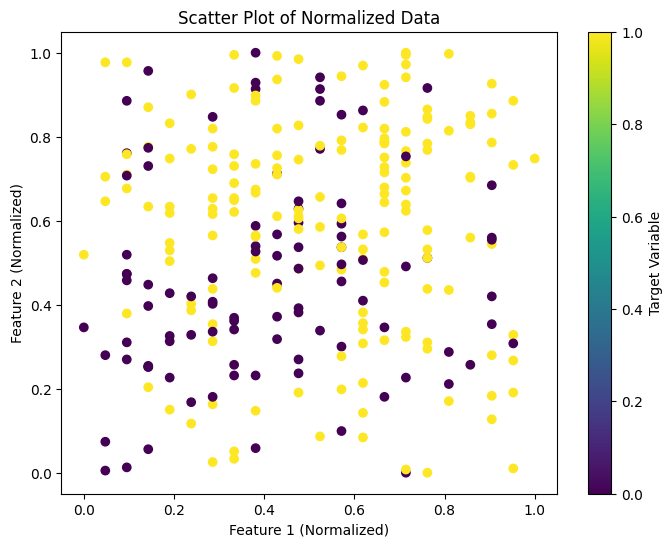

In [8]:
import matplotlib.pyplot as plt

# Assuming X_normalized and y are already defined

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.title('Scatter Plot of Normalized Data')
plt.colorbar(label='Target Variable')  # Add a colorbar if y represents classes
plt.show()

In [9]:
'''
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, y_train are already defined

y_train = y_train.astype(int)

# Get unique class labels
unique_labels = np.unique(y_train)

# Define colors and markers for each class
colors = ['blue', 'red', 'green', 'orange']  # Add more colors if needed
markers = ['o', 'x', 's', '^']  # Add more markers if needed

# Plot each class separately
for i, label in enumerate(unique_labels):
    class_data = X_train[y_train == label]
    plt.scatter(class_data[:, 0], class_data[:, 1],
                label=f'Class {label}',
                marker=markers[i % len(markers)],
                color=colors[i % len(colors)])

# Increase font size for all elements
plt.rcParams.update({'font.size': 14})

# Add labels and titles
plt.xlabel('Feature 1')

plt.ylabel('Feature 2')
plt.title('Scatter Plot')
plt.legend()
plt.show()
'''

"\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Assuming X_train, y_train are already defined\n\ny_train = y_train.astype(int)\n\n# Get unique class labels\nunique_labels = np.unique(y_train)\n\n# Define colors and markers for each class\ncolors = ['blue', 'red', 'green', 'orange']  # Add more colors if needed\nmarkers = ['o', 'x', 's', '^']  # Add more markers if needed\n\n# Plot each class separately\nfor i, label in enumerate(unique_labels):\n    class_data = X_train[y_train == label]\n    plt.scatter(class_data[:, 0], class_data[:, 1],\n                label=f'Class {label}',\n                marker=markers[i % len(markers)],\n                color=colors[i % len(colors)])\n\n# Increase font size for all elements\nplt.rcParams.update({'font.size': 14})\n\n# Add labels and titles\nplt.xlabel('Feature 1')\n\nplt.ylabel('Feature 2')\nplt.title('Scatter Plot')\nplt.legend()\nplt.show()\n"

In [10]:
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr', random_state=42, probability=True)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svm_classifier, X, y, cv=kf)

In [11]:
# Step 5: Interpret the results
print("Cross-Validation Scores for each fold:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())

Cross-Validation Scores for each fold: [0.77777778 0.8490566  0.77358491 0.71698113 0.81132075]
Mean Accuracy: 0.7857442348008385
Standard Deviation of Accuracy: 0.0438230360769943


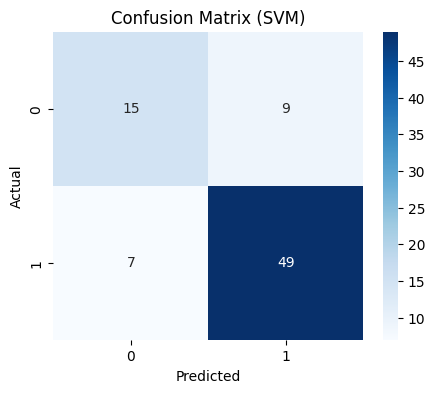

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the SVM classifier on training data
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


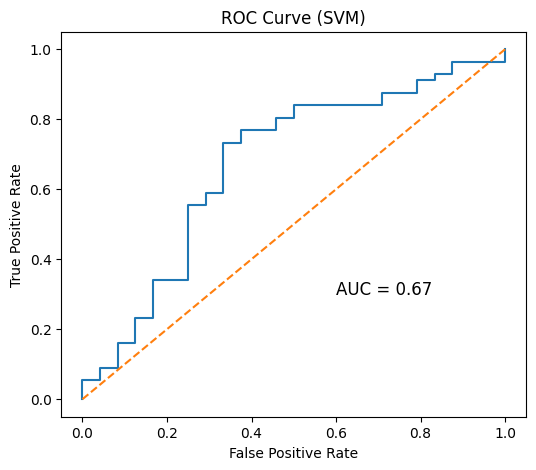

In [13]:
from sklearn.svm import SVC

svm_classifier = SVC(probability=True)   # Enables predict_proba
svm_classifier.fit(X_train, y_train)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate probability scores
y_probs = svm_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle="--")
plt.title("ROC Curve (SVM)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.text(0.6, 0.3, f"AUC = {roc_auc:.2f}", fontsize=12)
plt.show()



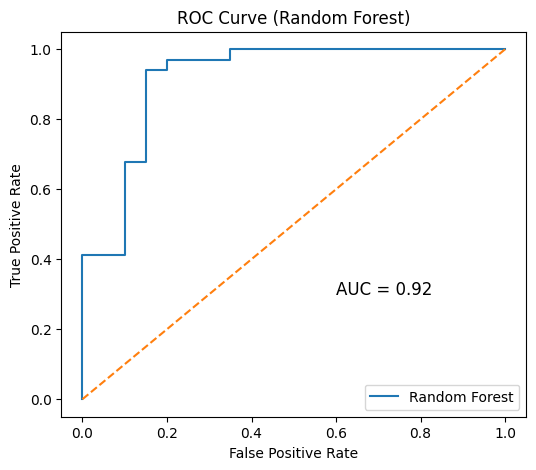

AUC Score of Random Forest: 0.9176470588235294


In [14]:
# --- Feature Engineering using your actual column names ---

RNFL_col = "Retinal Nerve Fiber Layer (RNFL) Thickness (Âµm)"
Macular_col = "Macular Thickness (Âµm)"

data["RNFL_per_Age"] = data[RNFL_col] / data["Age"]
data["Thickness_difference"] = data[Macular_col] - data[RNFL_col]
data["Thickness_ratio"] = data[RNFL_col] / data[Macular_col]

# Define your target column again (important!)
target_column = "Amyloid PET Scan Status"

# Re-create features_df with new columns
features_df = data.drop(columns=[target_column])
X_processed = pd.get_dummies(features_df, drop_first=True)

# Recreate X and y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = X_processed
y = le.fit_transform(data[target_column])

# Train–Test Split again for fairness
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train, y_train)

# ROC Curve + AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0,1], [0,1], linestyle="--")
plt.title("ROC Curve (Random Forest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.text(0.6, 0.3, f"AUC = {roc_auc:.2f}", fontsize=12)
plt.legend()
plt.show()

print("AUC Score of Random Forest:", roc_auc)


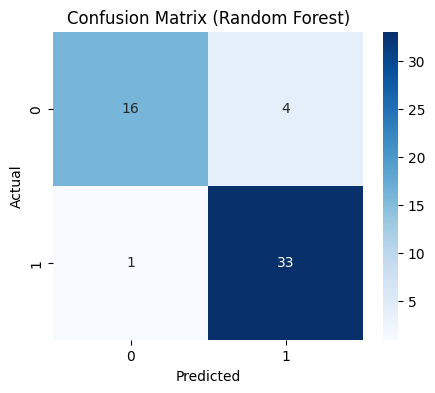

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_rf = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


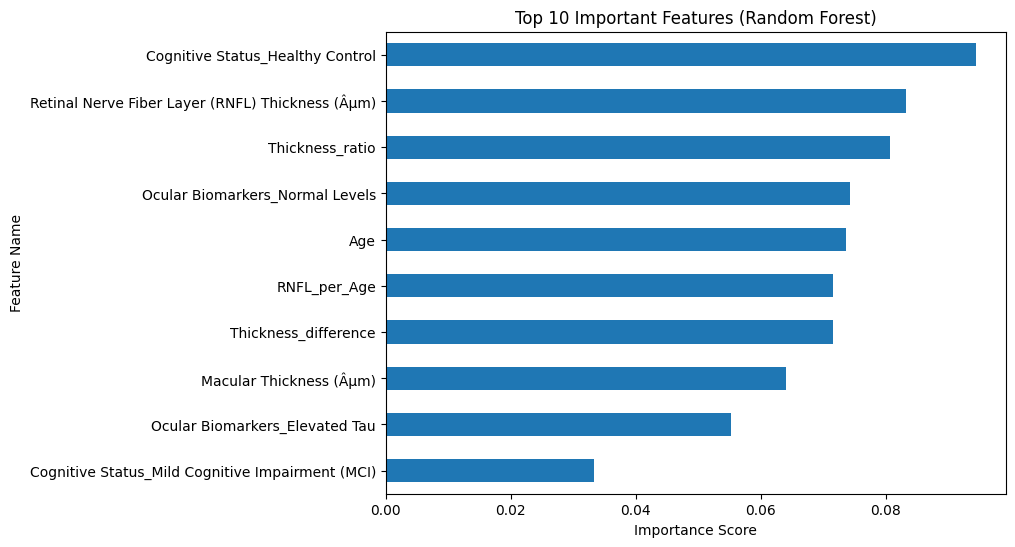

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feat_imp[:10].plot(kind='barh')
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.gca().invert_yaxis()
plt.show()


In [17]:
# --- NEW PATIENT PREDICTION DEMO (FINAL) ---

# 1. Create a sample new patient entry
new_patient = pd.DataFrame({
    RNFL_col: [90],                         # Example RNFL Thickness
    Macular_col: [270],                     # Example Macular Thickness
    "Age": [65],                             # Example Age
    "Gender": ["Female"],                    # Male / Female
    "Cognitive Status": ["Mild"],            # Normal / Mild / Severe
    "Retinal Amyloid Presence": ["Yes"],     # Yes / No
    "Ocular Biomarkers": ["Abnormal"]        # Normal / Abnormal
})

# 2. Apply one-hot encoding the SAME way as training data
new_processed = pd.get_dummies(new_patient)

# 3. Match training columns (very important)
new_processed = new_processed.reindex(columns=X.columns, fill_value=0)

# 4. Make prediction
new_pred = rf_model.predict(new_processed)
new_prob = rf_model.predict_proba(new_processed)[:, 1]

# 5. Print results
print("========== NEW PATIENT PREDICTION ==========\n")

print("Prediction:",
      "Positive (High Risk of Alzheimer's)" if new_pred[0] == 1 else "Negative (Low Risk)")

print("Probability of Alzheimer's:", round(new_prob[0], 2))


========== NEW PATIENT PREDICTION ==========

Prediction: Positive (High Risk of Alzheimer's)
Probability of Alzheimer's: 0.63
